# `Python` Recap para computación científica

En esta lección estudiaremos un repaso de la funcionalidad fundamental de `Python`, con énfasis en computación científica. Estudiaremos:
1. Funcionalidad fundamental
2. Funcionalidad esencial de de `NumPy`
3. Visualización y `matplotlib`
4. Breve introducción a `Scipy`
5. Programación orientada a objetos

## Funcionalidad fundamental

`Python` incluye varios `data-types` fundamentales útiles para realizar cálculos:

In [1]:
x = 10                 # int
y = 3.14               # float
is_valid = True        # bool
text = "Hello, Python" # str

Las `list` son arreglos de datos fundamentales que se utilizan para almacenar datos en memoria. Las `list` son arreglos dinámicos y son de tipo `mutable`, lo cual implica que su estado puede cambiar de forma global. Los arreglos se almacenan en el `heap`:

In [2]:
squares = [i**2 for i in range(10)]
even_squares = [x for x in squares if x % 2 == 0]

print(even_squares)

[0, 4, 16, 36, 64]


Note que las listas se pueden recorrer de forma iterativa utilizando `comprehensions`. Es decir, se puede construir una list iterando índices mudos en una sola línea de comandos con flujos de control.

Existen estructuras de datos `inmutable`, que no pueden ser modificados post-construcción:

In [3]:
tuple_ex = (1, 2, 3)
set_ex = {1, 2, 3, 3}         # {1, 2, 3}
dict_ex = {'a': 1, 'b': 2}

print(tuple_ex)
print(set_ex)
print(dict_ex)

(1, 2, 3)
{1, 2, 3}
{'a': 1, 'b': 2}


Note que los `set` solamente contienen datos únicos.

### Funciones y manejo de excepciones

Las funciones corresponden a los bloques de construcción más fundamentales en programación funcional y procedural. La idea de diseñar operaciones en funciones corresponde al concepto de **reutilizabilidad**. Se puede utilizar `try/except` para evitar posibles errores al momento de la ejecución: 

In [4]:
def mean_and_std(data):
    try:
        n = len(data)
        mean = sum(data) / n
        variance = sum((x - mean)**2 for x in data) / n
        return mean, variance**0.5
    except ZeroDivisionError:
        return None, None

Por ejemplo:

In [5]:
sample = [1, 2, 3, 4, 5]
mu, sigma = mean_and_std(sample)
print(f"Mean = {mu:.2f}, Std = {sigma:.2f}")

Mean = 3.00, Std = 1.41


Note el estilo del formato de hileras de caracteres que inluyen variables.

### Ecuaciones y LaTeX 

La sintaxis de LaTeX puede ser utilizada en los Jupyter Notebooks para escribir ecuaciones y expresiones matemáticas. 

Esto se puede hacer en línea:
$e^{i\pi} + 1 = 0$, o en ambientes de ecuaciones:

\begin{equation}
e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i
\end{equation}

En línea, las expresiones se escriben envolviendo el código con `$`:

```
$e^{i\pi} + 1 = 0$
```

Los ambientes de ecuaciones se envuelven en el ambiente `\begin{equation}` y `\end{equation}`:

```latex
\begin{equation}
e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i
\end{equation}
```

### Elementos esenciales de `NumPy`

`NumPy` es la biblioteca de mayor uso en computación científica. En gran medida, su uso estandarizado se debe a la flexibilidad de la estructura de datos conocida como `nd.array`.

La biblioteca se incluye en el ambiente usando la directriz:

In [6]:
import numpy as np

Por ejemplo, podemos crear dos vectores invocando el `custom constructor` usando una lista primitiva:

In [7]:
vecA = np.array([1, 2, 3])
vecB = np.array([4, 5, 6])

print(vecA)
print(vecB)

[1 2 3]
[4 5 6]


`NumPy` provee métodos de álgebra linea; tales como multiplicación, descomposición matricial, solución de sistemas lineas, entre otros. Por ejemplo:

In [8]:
prodAB_func = np.dot(vecA, vecB)
prodAB_method = vecA.dot(vecB)

np.allclose(prodAB_func, prodAB_method)

True

Adicionalmente, la estructura de datos permite objetos multidimensionales tales como matrices o tensores. Una forma de construir un objeto de este tipo es anidando listas de listas primitivas:

In [9]:
matA = np.array([[1, 2], [3, 4]])
matB = np.array([[5, 6], [7, 8]])

print(matA)
print(matB)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


Estos objetos también incluyen métodos algebraicos:

In [10]:
prod_matAmatB = matA.dot(matB)

print(prod_matAmatB)

[[19 22]
 [43 50]]


### Visualización usando `matplotlib`

`matplotlib` es una biblioteca de uso común para visualización. En particular cuando se utilizan ambientes integrados como este. La biblioteca se carga al ambiente con la directriz:

In [11]:
import matplotlib.pyplot as plt

Existen muchas formas de visualizar información. Por ejemplo:

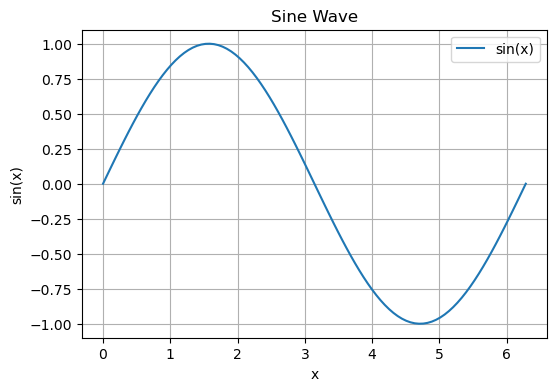

In [12]:
x = np.linspace(0, 2.0 * np.pi, 100)
y = np.sin(x)
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Wave')
plt.legend()
plt.grid(True)
plt.show()

La generación de **histogramas** va a ser de suma importancia en este curso para visualizar variables estocásticas. `matplotlib` y `NumPy` se puede utilizar en combinación para esta tarea. Por ejemplo, podemos generar una muestra de números aleatorios con base en una distribución normal (más de esto más adelante):

In [13]:
samples = np.random.normal(loc = 0.0, scale = 1.0, size = 1000)

Estas muestras se pueden dividir en `bins` (sub-secciones de datos de cierto tamaño). Veamos el método `plt.hist`:

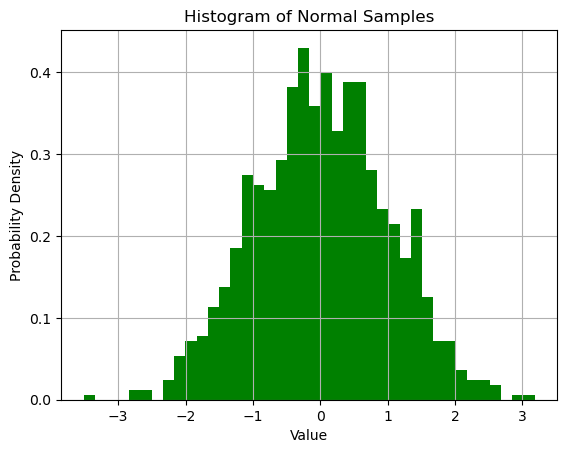

In [14]:
plt.figure()
plt.hist(samples, bins = 40, density = True, alpha = 1, color = 'g')
plt.title('Histogram of Normal Samples')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

De particular atención son los argumentos `bins` y `density`; los cuales representan el número de divisiones y la normalización de la distribución, respectivamente.

Una funcionalidad muy útil corresponde a utilizar **flujos de control booleanos** dentro de ambientes de visualización. Por ejemplo, generemos dos arreglos unidimensionales que contienen números aleatorios en el intervalo $[-1, 1]$ (más de esto en la próxima clase): 

In [15]:
xVals = np.random.uniform(low = -1.0, high = 1.0, size = 1000)
yVals = np.random.uniform(low = -1.0, high = 1.0, size = 1000)

Ahora podemos generar un gráfico de dispersión de estos valores, usando un diferente esquema de colores para aquellos valores que satisfacen cierta condición matemática. 

Por ejemplo, supongamos que deseamos visualizar los valores para los cuales $x^2 + y^2 >= 1$. Esto se puede hacer mediante la expresión `c = (xVals**2 + yVals**2 <= 1)`. Veamos:

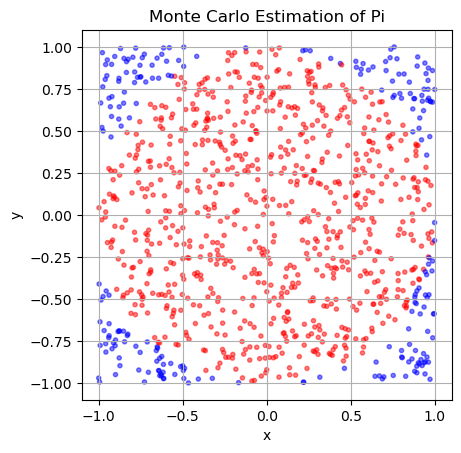

In [16]:
plt.figure
plt.scatter(xVals, yVals, c = (xVals**2 + yVals**2 <= 1), cmap = 'bwr', alpha = 0.5, marker = '.')
plt.title('Monte Carlo Estimation of Pi')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

### Problemas al tratar con aritmética de punto flotante

En computación, no tenemos acceso a los recursos requeridos para representar el conjunto de los números nenteros o reales (o, por extensión, el conjunto de los números complejos) en el sentido estricto matemático.

En su lugar, usamos una **aproximación**. Dicha aproximación se conoce como **numéros de punto flotante**. 

En computación científica, se debe tener **extremo** cuidado se utiliza esta representación. Un caso usual es cuando debemos **sustraer** dos números de punto flotante muy cercanos el uno del otro. En esos casos, la representación se satura y obtenemos los infames **errores de punto flotante**.

Considere el siguiente ejemplo. Sea
$$
f(x) = \frac{1 - \cos(x)}{x^2}.
$$
Sabemos que
$$
\lim_{x \to 0} f(x) = \frac{1}{2}.
$$
¿Qué pasa al evaluar este límite con recursos computacionales? Veamos.

Definamos un intervalo de la variable independiente, espaciado linealmente en escala logarítmica:

In [17]:
xValsl = np.logspace(-8, -1, 100) # 100 puntos espaciados linealmente en escala logarítmica desde 10^-8 hasta 10^-1

La función matemática puede ser definida como una función computacional:

In [18]:
def fFunc(xInd):
    return (1.0 - np.cos(xInd)) / xInd**2

Luego, evaluamos la función sobre cada uno de los puntos de la variable independiente:

In [19]:
yValsl = fFunc(xValsl)

Note que el código anterior utiliza `sintaxis vectorial`. Es decir, la función se aplica directamente sobre cada uno de los elementos contenidos en el arreglo `xValsl`. Esto se puede hacer sobre arreglos de tipo `nd.ndarray`, más no sobre listas primitivas de `Python`.

Realicemos un gráfico de como se comporta `fFunc`, la cual utilizamos para representar $f(x)$ en el límite de cuando la función se aproxima a cero:

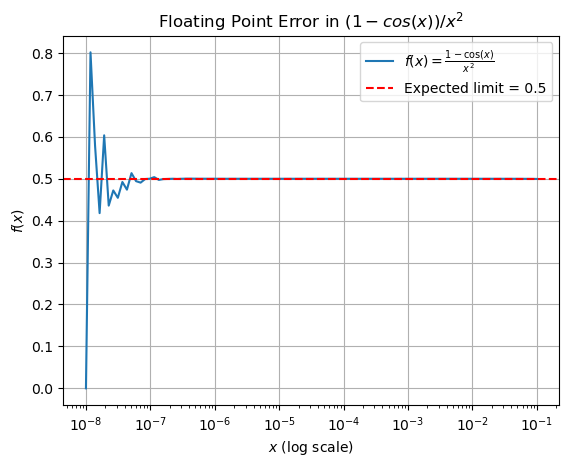

In [20]:
plt.plot(xValsl, yValsl, label=r"$f(x) = \frac{1 - \cos(x)}{x^2}$")
plt.axhline(0.5, color='red', linestyle='--', label="Expected limit = 0.5")
plt.xscale('log')
plt.xlabel("$x$ (log scale)")
plt.ylabel("$f(x)$")
plt.title("Floating Point Error in $(1 - cos(x)) / x^2$")
plt.legend()
plt.grid(True)
plt.show()

Note las desviaciones severas mientras la función se aproxima a cero. Esto se debe a errores de **punto flotante**.

En general, los errores de punto flotante son importantes en solamente algunas operaciones; tales como resta, derivación y/o procedimientos de diferencias finitas.

### Explorando la eficiencia de operaciones fundamentales

`Python` es un lenguaje interpretado. Algunas bibliotecas, tales como `NumPy` utilizan interfaces a código compilado para optimizar ciertas operaciones. La forma de realizar las operaciones, entonces, afecta la eficiencia computacional de representar resultados matemáticos. 

Veamos cuanto tarda realizar una suma de todos los elementos de una estructura de datos. 

In [21]:
import time

Generemos una lista primitiva de `Python`, usando elementos cualesquiera:

In [30]:
nSize = 10**8 # tamaño de la lista y/o arreglo de NumPy
data_list = list(range(nSize))

Ahora hagamos lo mismo con un arreglo de `NumPy`:

In [31]:
data_array = np.array(data_list)

Si quisieramos realizar una operación de suma sobre los elementos de `data_list`, tenemos dos opciones:
1. Implementar de forma iterativa la solución
2. Usar la función primitiva `sum()`.

Veamos cuánto tarda cada solución. De forma iterativa usando código nativo:

In [32]:
# 1. Iteración
start_iterative = time.time()
counter = 0
for val in data_list:
    counter += val
end_iterative = time.time()

print(end_iterative - start_iterative)

4.557663917541504


Usando un método interno de `Python`, obtenemos:

In [33]:
start_python = time.time()
count_p = sum(data_list)
end_python = time.time()

print(end_python - start_python)

0.5355062484741211


Vemos que este método es mucho más eficiente. Esto se debe a que la función interna es una interface a código compilado.

Usando arreglos de `NumPy`, obtenemos:

In [34]:
start_numpy = time.time()
count_n = np.sum(data_array)
end_numpy = time.time()

print(end_numpy - start_numpy)

0.03561758995056152


La solución con `NumPy` suele ser aún más eficiente. Esto se debe a que internamente la funcionalidad de `NumPy` utiliza recursos optimizados para cálculos científicos.

En general, una solución eficiente en computación científica utiliza bibliotecas optimizadas para los cálculos a ser realizados. En la mayoría de los casos, debemos depender de `NumPy` para operaciones matemáticas. La eficiencia de `NumPy` depende de los recursos y bibliotecas con la cual se instaló.

### Visualización dependiente de parámetros

Un recurso increíblemente útil en las ciencias es la posibilidad de cambiar de la visualización de los datos dependiendo de algún parámetro interno (e.g., temperatura, potencial químico, etc).

Esto se puede hacer usando `matplotlib.widgets.Slider`. 

Suponga que tenemos la función
$$
f(x, a) = \frac{\sin(ax)}{x}.
$$
Deseamos visualizar la variación $f(x, a)$ como función de $a$.

Primero definimos la función:

In [35]:
def fFvar(x, a):
    return np.sinc(a * x / np.pi) # sinc(x) := sin(pi * x) / (pi * x)

Luego declaramos los arreglos de la variable independiente y algún valor inicial:

In [28]:
xValsp = np.linspace(-10, 10, 500)
a0 = 1.0
yInit = fFvar(xValsp, a0)

La funcionalidad para la visualización interactiva se implementa de la siguiente forma:

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.1), Output()), _dom_classes=('wi…

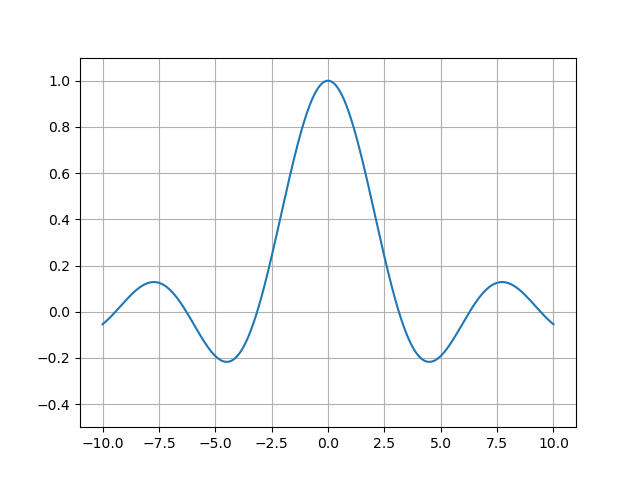

In [38]:
# Esto se utiliza para interactuar usando Jupyter-Notebook
%matplotlib widget
# ipywidgets provee la funcionalidad requerida, también podemos usar matplotlib.widgets 
import ipywidgets as widgets

fig, ax = plt.subplots()
# Se crea el gráfico con un valor inicial
line, = ax.plot(xValsp, fFvar(xValsp, 1.0))
# Límites del eje y
ax.set_ylim(-0.5, 1.1)
ax.grid(True)

# Se define una función que reevalúa el resultado
def update(a):
    line.set_ydata(fFvar(xValsp, a))
    fig.canvas.draw_idle()

# El ; al final funciona para indicarle al notebook que no enseñe el valor de retorno!
widgets.interact(update, a = widgets.FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0));

## Ejercicio: Entropía y la energía interna de un sistema de dos niveles

Considere un sistema de $N$ partículas **distinguibles** y que **no interactúan**.
Cada partícula puede estar en dos niveles:
- Estado base: $E = 0$
- Estado excitado: $E = \epsilon$

Sea $n$ la cantidad de partículas en el estado excitado. Entonces:
- La energía total del sistema es $U(n) = n \cdot \epsilon$
- El número total de estados posibles es $\Omega = \binom{N}{n}$
- La entropía del sistema se define como (usando $k_B = 1$): $S(n) = \log(\Omega(n))$

### Instrucciones:
1. Haga un `for loop` desde $n = 0$ hasta $N$
2. Para cada valor posible calcule:
   - La energía total $U(n)$
   - La cantidad total de estados $\Omega(n)$
   - La entropía $S(n)$
3. Realice un gráfico de $S(n)$ como función de la energía total $U(n)$

### Parámetros:
- Use $N = 50$ como el número total de partículas
- La energía del estado excitado $\epsilon = 1$ (unidades naturales)

### Pregunta:
- ¿Para cual valor de la energía total se obtiene la máxima entropía? ¿A cúal estado físico corresponde?

Parametros

In [62]:
N = 1020
eps = 1
k_b = 1

Funcion para calcular el coeficiente binomial

In [63]:
def calc_binom(N,n):
    binom = 1
    for i in range(n):
        binom = binom * (N - i)
        binom = binom / (i+1)

    return binom

Calculo de las variables

In [64]:
n = np.linspace(0,N,N+1).astype(int)

U = [i * eps for i in n]
Sigma = [calc_binom(N,i) for i in n]
S = [k_b * np.log(Sigma[i]) for i in n]

Grafico

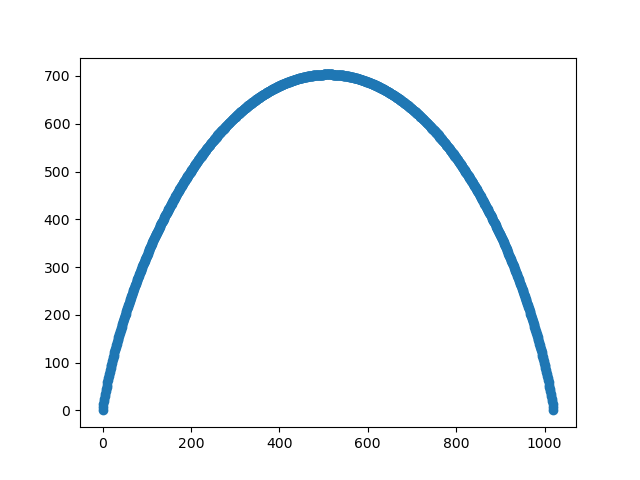

In [65]:
plt.clf()
plt.figure()
plt.scatter(U, S)
plt.show()

Pregunta:

    ¿Para cual valor de la energía total se obtiene la máxima entropía? ¿A cúal estado físico corresponde?

In [50]:
U[np.where(S == S.max())[0][0]]

np.float64(25.0)

Es el estado donde la mitad de las particulas estæn exitadas y la otra mitad estan en el estado base